In [1]:
#imports

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os
from scipy.cluster.hierarchy import fcluster, cophenet
import seaborn as sns


%matplotlib inline

In [2]:
def corrmat(df):
# Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    return sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
    

In [3]:
# load the data
filename = 'All Raw Data.csv'
df = pd.read_csv('data/' + filename, index_col = 'Unnamed: 0')

# remove line 1 (not a float value)
df = df[1:]

In [4]:
df.head()

,Fe,Ni,Cu,Zn,Zr,Ag,Ag.1,Cd,Cd.1,Sn,Sn.1,Sb,Sb.1,Pb,Pb.1
86W-8ES1-037-001_leadball-15mm_,18499,114,2012,802,3832,4466,1156,17941,0,3853,-1,-7,402,2381851,16607
17L-6568-001_leadball-13mm-spen,23268,160,2028,935,4416,4766,1365,18489,0,4352,0,3,1003,2395509,15105
17L-5743-006_leadball-12mm_spen,21923,106,3250,745,4439,4457,1330,17446,0,3539,0,-13,219,2349637,12089
16L-3746-001_leadball-13mm_40v_,9126,1,5793,1036,3793,3565,1201,12474,0,2597,0,-6,569,2064305,18470
16L-3431-003_leadball-14mm_40v_,14389,859,2897,1983,3755,4306,1332,14766,0,2904,0,-17,340,2204737,16333


In [5]:
# convert all objects to floats
cols = df.columns[df.dtypes.eq(object)]
for c in cols:
    df[c] = pd.to_numeric(df[c], errors='coerce', downcast='float')

In [6]:
df.corr()

,Fe,Ni,Cu,Zn,Zr,Ag,Ag.1,Cd,Cd.1,Sn,Sn.1,Sb,Sb.1,Pb,Pb.1
Fe,1.000000,-0.013235,-0.058116,0.655870,0.515770,0.114638,0.224512,0.055784,NaN,0.107350,0.098601,-0.206184,0.105493,0.052597,-0.245454
Ni,-0.013235,1.000000,0.153443,0.222505,0.099667,0.369460,-0.306957,0.342957,NaN,0.180284,0.016577,-0.171973,0.138818,0.357153,0.333919
Cu,-0.058116,0.153443,1.000000,-0.033937,0.261951,0.540412,-0.577409,0.515136,NaN,0.260825,0.000687,-0.068460,0.274005,0.584070,0.615574
Zn,0.655870,0.222505,-0.033937,1.000000,0.277934,0.083811,0.104047,0.082783,NaN,0.180192,0.175972,-0.134120,0.005412,0.024800,-0.106424
Zr,0.515770,0.099667,0.261951,0.277934,1.000000,0.578841,-0.280219,0.534183,NaN,0.378821,0.189838,-0.244428,0.263614,0.530639,0.367756
Ag,0.114638,0.369460,0.540412,0.083811,0.578841,1.000000,-0.846555,0.980641,NaN,0.713557,0.298195,-0.195403,0.387112,0.979490,0.870567
Ag.1,0.224512,-0.306957,-0.577409,0.104047,-0.280219,-0.846555,1.000000,-0.844773,NaN,-0.625110,-0.261956,0.125438,-0.307499,-0.897252,-0.943805
Cd,0.055784,0.342957,0.515136,0.082783,0.534183,0.980641,-0.844773,1.000000,NaN,0.701796,0.266143,-0.161072,0.358361,0.956418,0.870984
Cd.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sn,0.107350,0.180284,0.260825,0.180192,0.378821,0.713557,-0.625110,0.701796,NaN,1.000000,0.855699,-0.093279,0.283084,0.655676,0.573362


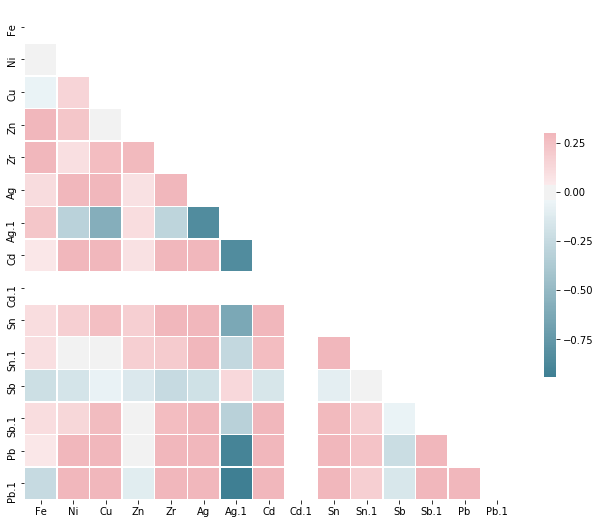

In [7]:
corrmat(df);

Cophenetic Correlation Coefficient:0.8190339990875549


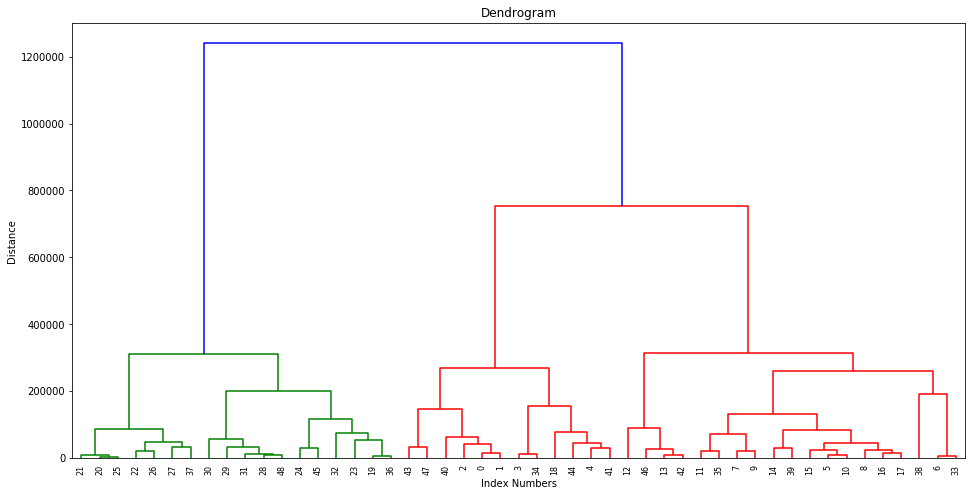

,Fe,Ni,Cu,Zn,Zr,Ag,Ag.1,Cd,Cd.1,Sn,Sn.1,Sb,Sb.1,Pb,Pb.1,cluster
86W-8ES1-037-001_leadball-15mm_,18499.0,114.0,2012.0,802.0,3832.0,4466.0,1156.0,17941.0,0.0,3853.0,-1.0,-7.0,402.0,2381851.0,16607.0,21
17L-6568-001_leadball-13mm-spen,23268.0,160.0,2028.0,935.0,4416.0,4766.0,1365.0,18489.0,0.0,4352.0,0.0,3.0,1003.0,2395509.0,15105.0,22
17L-5743-006_leadball-12mm_spen,21923.0,106.0,3250.0,745.0,4439.0,4457.0,1330.0,17446.0,0.0,3539.0,0.0,-13.0,219.0,2349637.0,12089.0,23
16L-3746-001_leadball-13mm_40v_,9126.0,1.0,5793.0,1036.0,3793.0,3565.0,1201.0,12474.0,0.0,2597.0,0.0,-6.0,569.0,2064305.0,18470.0,25
16L-3431-003_leadball-14mm_40v_,14389.0,859.0,2897.0,1983.0,3755.0,4306.0,1332.0,14766.0,0.0,2904.0,0.0,-17.0,340.0,2204737.0,16333.0,27
17L-7021-001_leadball-8mm_40v_2,15521.0,184.0,2062.0,686.0,2728.0,2307.0,1453.0,6377.0,0.0,1492.0,0.0,9.0,325.0,1542362.0,9316.0,41
17L-7015-003_leadball-7mm_40v_2,8347.0,88.0,1904.0,784.0,2422.0,2033.0,1578.0,4872.0,0.0,1164.0,0.0,37.0,235.0,1340572.0,9490.0,47
17L-7011-001_leadball-8mm_40v_2,16836.0,221.0,2368.0,650.0,3619.0,2717.0,1612.0,7431.0,0.0,1478.0,0.0,30.0,148.0,1600922.0,9716.0,37
17L-7002-008_leadball-8mm_40v_2,11778.0,45.0,1846.0,487.0,2888.0,2494.0,1671.0,6288.0,0.0,1066.0,0.0,-2.0,646.0,1481688.0,10478.0,46
17L-7001-001_leadball-8mm_40v_2,20546.0,231.0,2142.0,718.0,3135.0,2677.0,1707.0,6985.0,0.0,1359.0,0.0,6.0,339.0,1580242.0,7854.0,38


In [8]:
# Convert our data to a matrix to pass to the clustering algorithm:
X = df.values

# Implement the clustering algorithm using the centroid method:
Z = linkage(X, 'centroid')

# Calculate the cophenetic correlation coefficient to see how well the algorithm has measured the distances between the points:
c, coph_dists = cophenet(Z, pdist(X))
print('Cophenetic Correlation Coefficient:' + str(c))

# now let's make our dendrogram
fig= plt.figure(figsize=(16,8))
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.savefig('outputs/lead_clusters.png')
plt.show()


# we can see that no links exist above a distance of 200 - so we will set maximum distance at 200 and use the fclusters function from scipy.cluster.hierarchy, which will return our cluster ID's.

max_dist = 200 # pairwise distance

# Fcluster here
df['cluster'] = fcluster(Z, max_dist, criterion='distance')
df.to_csv('outputs/lead_clusters.csv', index=False)

df

## drop Lead  ['Pb', 'Pb.1']

Cophenetic Correlation Coefficient:0.7905718721300793


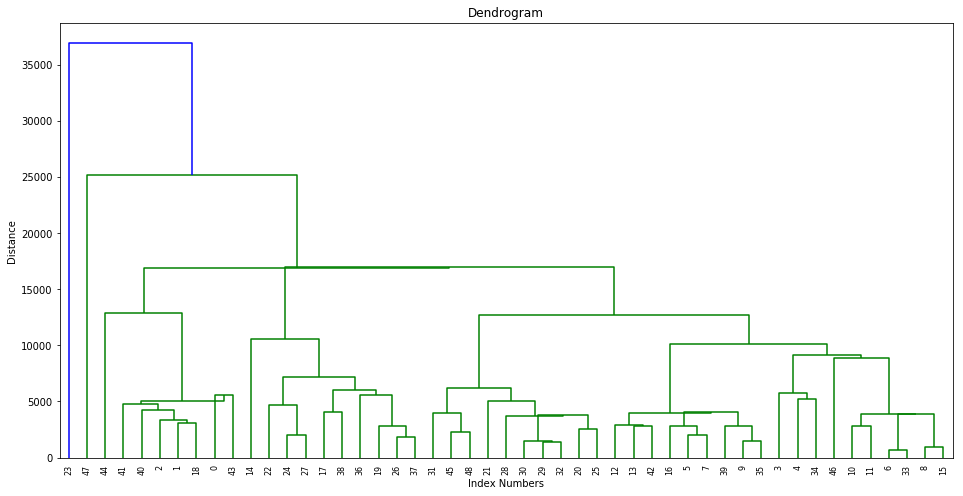

,Fe,Ni,Cu,Zn,Zr,Ag,Ag.1,Cd,Cd.1,Sn,Sn.1,Sb,Sb.1,Pb.1,cluster
86W-8ES1-037-001_leadball-15mm_,18499.0,114.0,2012.0,802.0,3832.0,4466.0,1156.0,17941.0,0.0,3853.0,-1.0,-7.0,402.0,16607.0,6
17L-6568-001_leadball-13mm-spen,23268.0,160.0,2028.0,935.0,4416.0,4766.0,1365.0,18489.0,0.0,4352.0,0.0,3.0,1003.0,15105.0,1
17L-5743-006_leadball-12mm_spen,21923.0,106.0,3250.0,745.0,4439.0,4457.0,1330.0,17446.0,0.0,3539.0,0.0,-13.0,219.0,12089.0,3
16L-3746-001_leadball-13mm_40v_,9126.0,1.0,5793.0,1036.0,3793.0,3565.0,1201.0,12474.0,0.0,2597.0,0.0,-6.0,569.0,18470.0,40
16L-3431-003_leadball-14mm_40v_,14389.0,859.0,2897.0,1983.0,3755.0,4306.0,1332.0,14766.0,0.0,2904.0,0.0,-17.0,340.0,16333.0,38
17L-7021-001_leadball-8mm_40v_2,15521.0,184.0,2062.0,686.0,2728.0,2307.0,1453.0,6377.0,0.0,1492.0,0.0,9.0,325.0,9316.0,32
17L-7015-003_leadball-7mm_40v_2,8347.0,88.0,1904.0,784.0,2422.0,2033.0,1578.0,4872.0,0.0,1164.0,0.0,37.0,235.0,9490.0,43
17L-7011-001_leadball-8mm_40v_2,16836.0,221.0,2368.0,650.0,3619.0,2717.0,1612.0,7431.0,0.0,1478.0,0.0,30.0,148.0,9716.0,33
17L-7002-008_leadball-8mm_40v_2,11778.0,45.0,1846.0,487.0,2888.0,2494.0,1671.0,6288.0,0.0,1066.0,0.0,-2.0,646.0,10478.0,45
17L-7001-001_leadball-8mm_40v_2,20546.0,231.0,2142.0,718.0,3135.0,2677.0,1707.0,6985.0,0.0,1359.0,0.0,6.0,339.0,7854.0,35


In [9]:
dropPb = ['Pb' ]

df_no_pb = df.drop(dropPb, axis = 1)

# Convert our data to a matrix to pass to the clustering algorithm:
X = df_no_pb.values

# Implement the clustering algorithm using the centroid method:
Z = linkage(X, 'centroid')

# Calculate the cophenetic correlation coefficient to see how well the algorithm has measured the distances between the points:
c, coph_dists = cophenet(Z, pdist(X))
print('Cophenetic Correlation Coefficient:' + str(c))

# now let's make our dendrogram
fig= plt.figure(figsize=(16,8))
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.savefig('outputs/lead_clusters_no_Pb.png')
plt.show()


# we can see that no links exist above a distance of 200 - so we will set maximum distance at 200 and use the fclusters function from scipy.cluster.hierarchy, which will return our cluster ID's.

max_dist = 200 # pairwise distance

# Fcluster here
df_no_pb['cluster'] = fcluster(Z, max_dist, criterion='distance')

df_no_pb.to_csv('outputs/lead_clusters_no_Pb.csv', index=False)
df_no_pb

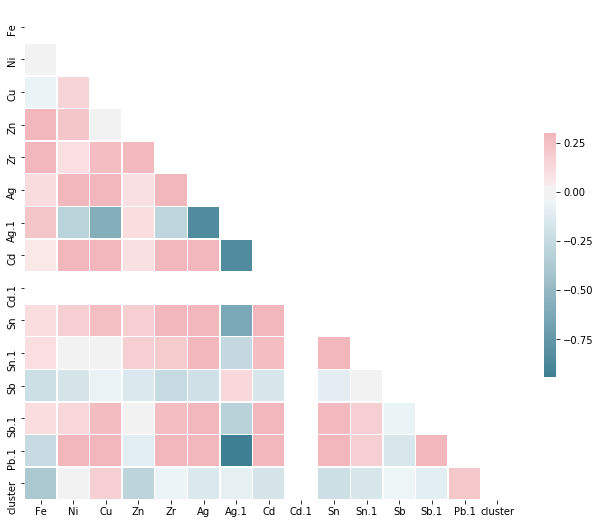

In [10]:
corrmat(df_no_pb);

Cophenetic Correlation Coefficient:0.8190457073075774


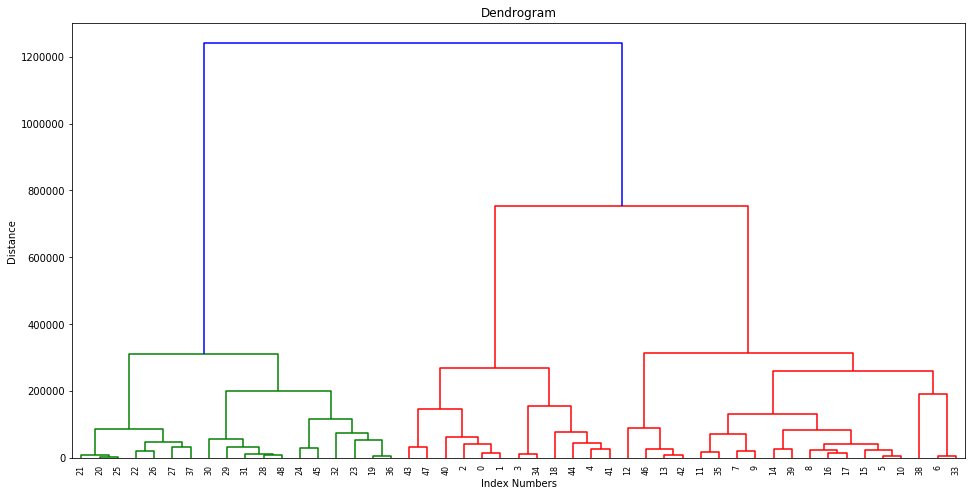

,Fe,Ni,Cu,Zn,Zr,Ag,Ag.1,Cd,Cd.1,Sn,Sn.1,Sb,Sb.1,Pb,cluster
86W-8ES1-037-001_leadball-15mm_,18499.0,114.0,2012.0,802.0,3832.0,4466.0,1156.0,17941.0,0.0,3853.0,-1.0,-7.0,402.0,2381851.0,21
17L-6568-001_leadball-13mm-spen,23268.0,160.0,2028.0,935.0,4416.0,4766.0,1365.0,18489.0,0.0,4352.0,0.0,3.0,1003.0,2395509.0,22
17L-5743-006_leadball-12mm_spen,21923.0,106.0,3250.0,745.0,4439.0,4457.0,1330.0,17446.0,0.0,3539.0,0.0,-13.0,219.0,2349637.0,23
16L-3746-001_leadball-13mm_40v_,9126.0,1.0,5793.0,1036.0,3793.0,3565.0,1201.0,12474.0,0.0,2597.0,0.0,-6.0,569.0,2064305.0,25
16L-3431-003_leadball-14mm_40v_,14389.0,859.0,2897.0,1983.0,3755.0,4306.0,1332.0,14766.0,0.0,2904.0,0.0,-17.0,340.0,2204737.0,27
17L-7021-001_leadball-8mm_40v_2,15521.0,184.0,2062.0,686.0,2728.0,2307.0,1453.0,6377.0,0.0,1492.0,0.0,9.0,325.0,1542362.0,44
17L-7015-003_leadball-7mm_40v_2,8347.0,88.0,1904.0,784.0,2422.0,2033.0,1578.0,4872.0,0.0,1164.0,0.0,37.0,235.0,1340572.0,47
17L-7011-001_leadball-8mm_40v_2,16836.0,221.0,2368.0,650.0,3619.0,2717.0,1612.0,7431.0,0.0,1478.0,0.0,30.0,148.0,1600922.0,37
17L-7002-008_leadball-8mm_40v_2,11778.0,45.0,1846.0,487.0,2888.0,2494.0,1671.0,6288.0,0.0,1066.0,0.0,-2.0,646.0,1481688.0,43
17L-7001-001_leadball-8mm_40v_2,20546.0,231.0,2142.0,718.0,3135.0,2677.0,1707.0,6985.0,0.0,1359.0,0.0,6.0,339.0,1580242.0,38


In [11]:
dropPb1 = ['Pb.1' ]

df_no_pb1 = df.drop(dropPb1, axis = 1)

# Convert our data to a matrix to pass to the clustering algorithm:
X = df_no_pb1.values

# Implement the clustering algorithm using the centroid method:
Z = linkage(X, 'centroid')

# Calculate the cophenetic correlation coefficient to see how well the algorithm has measured the distances between the points:
c, coph_dists = cophenet(Z, pdist(X))
print('Cophenetic Correlation Coefficient:' + str(c))

# now let's make our dendrogram
fig= plt.figure(figsize=(16,8))
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.savefig('outputs/lead_clusters_no_pb1.png')
plt.show()


# we can see that no links exist above a distance of 200 - so we will set maximum distance at 200 and use the fclusters function from scipy.cluster.hierarchy, which will return our cluster ID's.

max_dist = 200 # pairwise distance

# Fcluster here
df_no_pb1['cluster'] = fcluster(Z, max_dist, criterion='distance')

df_no_pb1.to_csv('outputs/lead_clusters_no_pb1.csv', index=False)
df_no_pb1

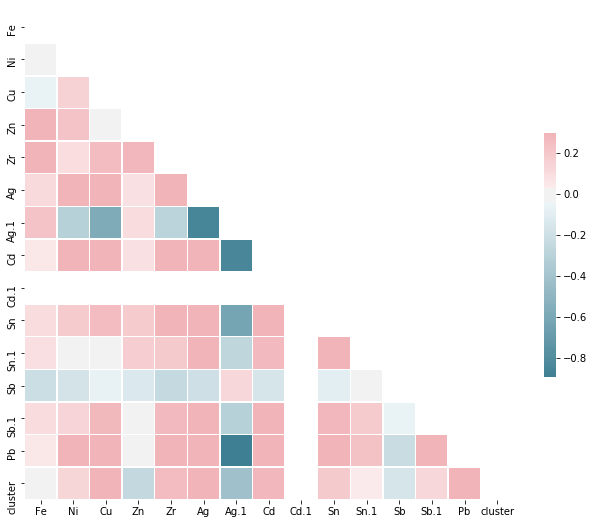

In [12]:
corrmat(df_no_pb1);

# No lead

Cophenetic Correlation Coefficient:0.7973456840274806


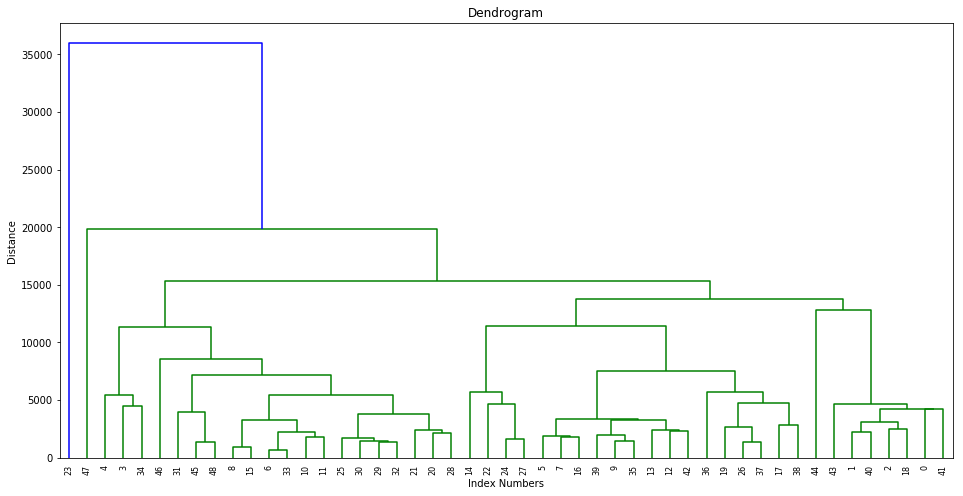

,Fe,Ni,Cu,Zn,Zr,Ag,Ag.1,Cd,Cd.1,Sn,Sn.1,Sb,Sb.1,cluster
86W-8ES1-037-001_leadball-15mm_,18499.0,114.0,2012.0,802.0,3832.0,4466.0,1156.0,17941.0,0.0,3853.0,-1.0,-7.0,402.0,44
17L-6568-001_leadball-13mm-spen,23268.0,160.0,2028.0,935.0,4416.0,4766.0,1365.0,18489.0,0.0,4352.0,0.0,3.0,1003.0,40
17L-5743-006_leadball-12mm_spen,21923.0,106.0,3250.0,745.0,4439.0,4457.0,1330.0,17446.0,0.0,3539.0,0.0,-13.0,219.0,42
16L-3746-001_leadball-13mm_40v_,9126.0,1.0,5793.0,1036.0,3793.0,3565.0,1201.0,12474.0,0.0,2597.0,0.0,-6.0,569.0,1
16L-3431-003_leadball-14mm_40v_,14389.0,859.0,2897.0,1983.0,3755.0,4306.0,1332.0,14766.0,0.0,2904.0,0.0,-17.0,340.0,3
17L-7021-001_leadball-8mm_40v_2,15521.0,184.0,2062.0,686.0,2728.0,2307.0,1453.0,6377.0,0.0,1492.0,0.0,9.0,325.0,27
17L-7015-003_leadball-7mm_40v_2,8347.0,88.0,1904.0,784.0,2422.0,2033.0,1578.0,4872.0,0.0,1164.0,0.0,37.0,235.0,9
17L-7011-001_leadball-8mm_40v_2,16836.0,221.0,2368.0,650.0,3619.0,2717.0,1612.0,7431.0,0.0,1478.0,0.0,30.0,148.0,25
17L-7002-008_leadball-8mm_40v_2,11778.0,45.0,1846.0,487.0,2888.0,2494.0,1671.0,6288.0,0.0,1066.0,0.0,-2.0,646.0,7
17L-7001-001_leadball-8mm_40v_2,20546.0,231.0,2142.0,718.0,3135.0,2677.0,1707.0,6985.0,0.0,1359.0,0.0,6.0,339.0,28


In [13]:
droplead = ['Pb', 'Pb.1']

df_no_lead = df.drop(droplead, axis = 1)

# Convert our data to a matrix to pass to the clustering algorithm:
X = df_no_lead.values

# Implement the clustering algorithm using the centroid method:
Z = linkage(X, 'centroid')

# Calculate the cophenetic correlation coefficient to see how well the algorithm has measured the distances between the points:
c, coph_dists = cophenet(Z, pdist(X))
print('Cophenetic Correlation Coefficient:' + str(c))

# now let's make our dendrogram
fig= plt.figure(figsize=(16,8))
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.savefig('outputs/lead_clusters_no_lead.png')
plt.show()


# we can see that no links exist above a distance of 200 - so we will set maximum distance at 200 and use the fclusters function from scipy.cluster.hierarchy, which will return our cluster ID's.

max_dist = 200 # pairwise distance

# Fcluster here
df_no_lead['cluster'] = fcluster(Z, max_dist, criterion='distance')

df_no_lead.to_csv('outputs/lead_clusters_no_lead.csv', index=False)
df_no_lead

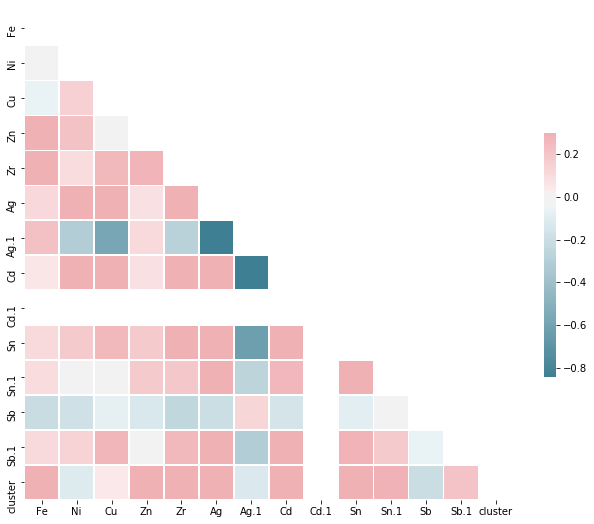

In [14]:
corrmat(df_no_lead);